In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline


In [98]:
df = pd.read_csv("df_final_demo.txt")
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.00,73.00,60.50,U,2.00,45105.30,6.00,9.00
1,2304905,7.00,94.00,58.00,U,2.00,110860.30,6.00,9.00
2,1439522,5.00,64.00,32.00,U,2.00,52467.79,6.00,9.00
3,1562045,16.00,198.00,49.00,M,2.00,67454.65,3.00,6.00
4,5126305,12.00,145.00,33.00,F,2.00,103671.75,0.00,3.00
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.00,56.00,38.50,U,3.00,1411062.68,5.00,5.00
70605,8981690,12.00,148.00,31.00,M,2.00,101867.07,6.00,6.00
70606,333913,16.00,198.00,61.50,F,2.00,40745.00,3.00,3.00
70607,1573142,21.00,255.00,68.00,M,3.00,475114.69,4.00,4.00


In [99]:
df1 = pd.read_csv("df_final_experiment_clients.txt")

df1

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [100]:
# merge final_demo + final_experiment_clients
dem_ex=pd.merge(df, df1, on='client_id', how='left')

# drop NaN in column variation 
dem_ex.dropna(subset=['Variation','clnt_tenure_yr', 'clnt_tenure_mnth', 'num_accts', 'calls_6_mnth', 'logons_6_mnth'],inplace= True)

# Handle missing values
print("Missing values per column:\n", dem_ex.isnull().sum())

# column names in lower case
dem_ex.columns = dem_ex.columns.str.lower()

# columns conversions
cols_to_int = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'num_accts', 'calls_6_mnth', 'logons_6_mnth']
dem_ex[cols_to_int] = dem_ex[cols_to_int].astype('Int64')

# drop duplicate from client_id
dem_ex.drop_duplicates(subset=['client_id'], keep='first', inplace=True)

# round column bal 
dem_ex['bal'] = dem_ex['bal'].round(2)

dem_ex

Missing values per column:
 client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            1
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
Variation           0
dtype: int64


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
0,836976,6,73,60.50,U,2,45105.30,6,9,Test
1,2304905,7,94,58.00,U,2,110860.30,6,9,Control
2,1439522,5,64,32.00,U,2,52467.79,6,9,Test
3,1562045,16,198,49.00,M,2,67454.65,3,6,Test
4,5126305,12,145,33.00,F,2,103671.75,0,3,Control
...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21,262,68.50,M,3,372100.59,6,9,Test
50496,6967120,21,260,68.50,M,3,4279873.38,6,9,Control
50497,5826160,20,249,56.50,F,2,44837.16,2,5,Test
50498,8739285,19,229,69.50,F,2,44994.24,1,4,Test


In [101]:
pt1 = pd.read_csv('df_final_web_data_pt_1.txt', sep=',')
pt1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [102]:
pt2 = pd.read_csv('df_final_web_data_pt_2.txt', sep=',')
pt2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [103]:
# Combine the two web data files
web_data = pd.concat([pt1, pt2], axis=0, ignore_index=True)

# Drop duplicates
web_data.drop_duplicates(inplace=True)

# Handle missing values
print("Missing values per column:\n", web_data.isnull().sum())

# Drop rows missing key identifiers
web_data.dropna(subset=['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], inplace=True)

# Convert date column to datetime
web_data['date_time'] = pd.to_datetime(web_data['date_time'], errors='coerce')

# Drop rows where date_time failed conversion
web_data = web_data.dropna(subset=['date_time'])

# Ensure correct data types
web_data['client_id'] = web_data['client_id'].astype(int)

# Sort by client and time
web_data.sort_values(by=['client_id', 'date_time'], inplace=True)

# Reset index
web_data.reset_index(drop=True, inplace=True)

Missing values per column:
 client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64


In [104]:
# Merge demographics + experiment data and web data
merged = web_data.merge(dem_ex, on='client_id', how='left')
merged = merged.dropna()

merged

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
12,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,3,46,29.50,U,2,25454.66,2,6,Test
13,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,3,46,29.50,U,2,25454.66,2,6,Test
14,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,3,46,29.50,U,2,25454.66,2,6,Test
15,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,3,46,29.50,U,2,25454.66,2,6,Test
16,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,3,46,29.50,U,2,25454.66,2,6,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744612,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,10,124,31.00,F,3,107059.74,6,9,Test
744613,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,10,124,31.00,F,3,107059.74,6,9,Test
744614,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,10,124,31.00,F,3,107059.74,6,9,Test
744627,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,23,281,49.00,F,2,431887.61,1,4,Test


In [ ]:
# 1. Prepare Client-Level Demographic Data
# Drop duplicates from 'merged' to ensure 1 row per client for demographics.
client_df = merged.drop_duplicates(subset=['client_id'], keep='first').copy()

data_size = 5000
np.random.seed(42)

merged = pd.DataFrame({
    'client_id': np.arange(1, data_size + 1),
    'clnt_age': np.random.randint(18, 85, data_size),
    # Tenure in years, with a vast majority being long-standing (>0.5 year)
    'clnt_tenure_yr': np.random.lognormal(mean=1.5, sigma=0.8, size=data_size) + 0.1,
    'gendr': np.random.choice(['F', 'M', 'U'], size=data_size, p=[0.15, 0.15, 0.70]),
    'logons_6_mnth': np.random.poisson(lam=5, size=data_size),
    'calls_6_mnth': np.random.poisson(lam=3.5, size=data_size)
})

# Simulate the effect of merging leading to some duplicate client_ids for events
merged_events = pd.concat([merged.iloc[:int(data_size*0.1)].copy(), merged], ignore_index=True)
merged = merged_events


# --- 2. Data Preparation (New Client-Level DataFrame and Columns) ---

# Drop duplicates from 'merged' to ensure 1 row per client for demographics.
client_df = merged.drop_duplicates(subset=['client_id'], keep='first').copy()

# Create the requested Age Group column (bins: 20-40, 40-60, 60-80)
bins = [0, 20, 40, 60, 80, client_df['clnt_age'].max() + 1]
# Labels are adjusted to reflect standard interval notation [lower, upper)
labels = ['<20', '20-39', '40-59', '60-79', '80+']

client_df['age_group_user'] = pd.cut(
    client_df['clnt_age'],
    bins=bins,
    labels=labels,
    right=False, # Includes the lower bound, excludes the upper bound (e.g., 40-59)
    include_lowest=True
)

# Create 'client_type' column based on tenure (using 180 days cutoff)
client_df['client_tenure_days'] = client_df['clnt_tenure_yr'] * 365.25

client_df['client_type'] = pd.cut(
    client_df['client_tenure_days'],
    bins=[-1, 180, client_df['client_tenure_days'].max() + 1],
    labels=['New (<= 6 months)', 'Long-standing (> 6 months)']
)



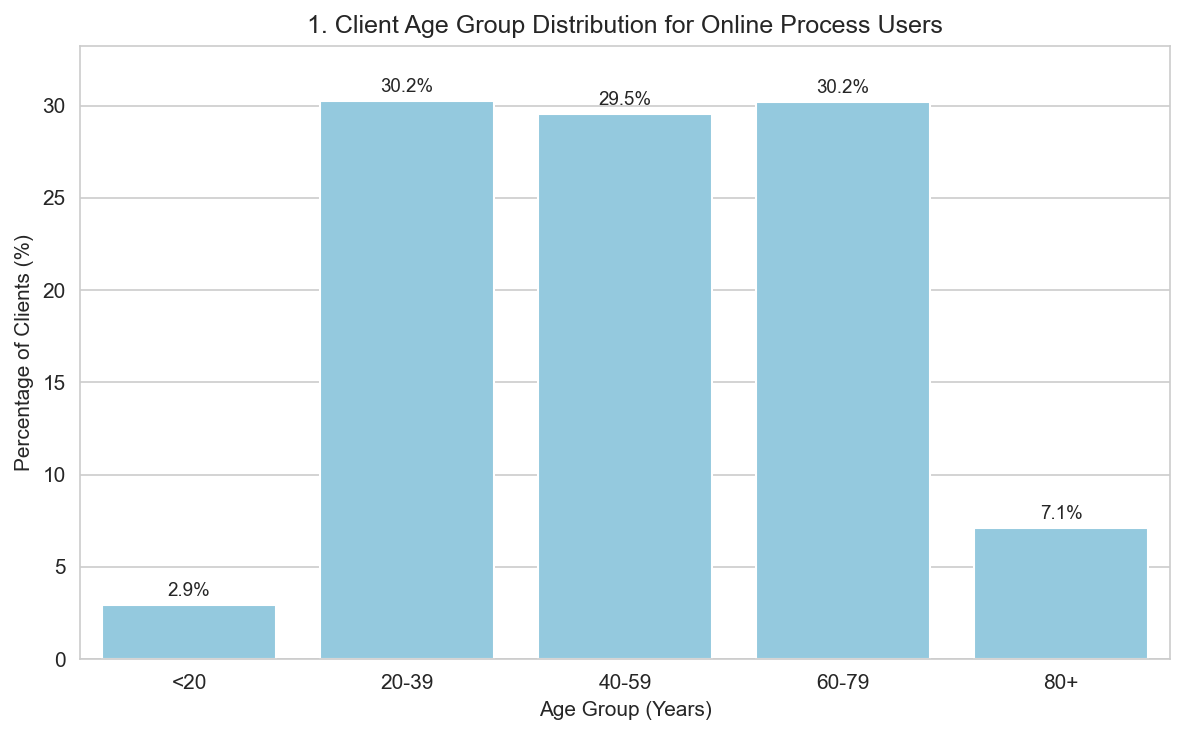

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 3. Visualization Script ---

# Set a consistent style for the plots
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 150

# --- Plot 1: Client Age Group Distribution ---
plt.figure(figsize=(8, 5))
age_counts = client_df['age_group_user'].value_counts(normalize=True).sort_index()
sns.barplot(x=age_counts.index, y=age_counts.values * 100, color='skyblue')

# Add percentage labels on top of the bars
for i, v in enumerate(age_counts.values):
    plt.text(i, v * 100 + 0.5, f'{v * 100:.1f}%', ha='center', fontsize=9)

plt.title('1. Client Age Group Distribution for Online Process Users', fontsize=12)
plt.ylabel('Percentage of Clients (%)', fontsize=10)
plt.xlabel('Age Group (Years)', fontsize=10)
plt.xticks(rotation=0)
plt.ylim(0, age_counts.values.max() * 100 * 1.1)
plt.tight_layout()

plt.show()


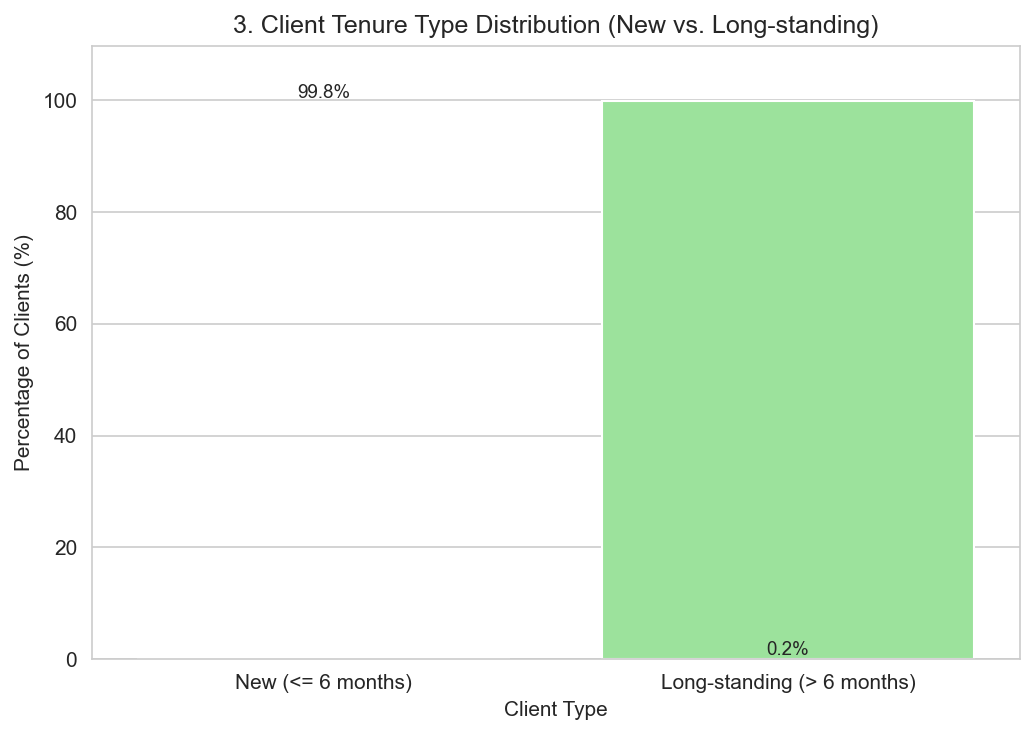

In [123]:
# --- Plot 3: Client Tenure Type Distribution ---
plt.figure(figsize=(7, 5))
tenure_counts = client_df['client_type'].value_counts(normalize=True).sort_index(ascending=False)
sns.barplot(x=tenure_counts.index, y=tenure_counts.values * 100, color='lightgreen')

# Add percentage labels
for i, v in enumerate(tenure_counts.values):
    plt.text(i, v * 100 + 0.5, f'{v * 100:.1f}%', ha='center', fontsize=9)

plt.title('3. Client Tenure Type Distribution (New vs. Long-standing)', fontsize=12)
plt.ylabel('Percentage of Clients (%)', fontsize=10)
plt.xlabel('Client Type', fontsize=10)
plt.xticks(rotation=0)
plt.ylim(0, tenure_counts.values.max() * 100 * 1.1)
plt.tight_layout()
plt.show()



C:\Users\rahal\AppData\Local\Temp\ipykernel_17040\954012656.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='client_type', y='clnt_age', data=client_df, palette="coolwarm")


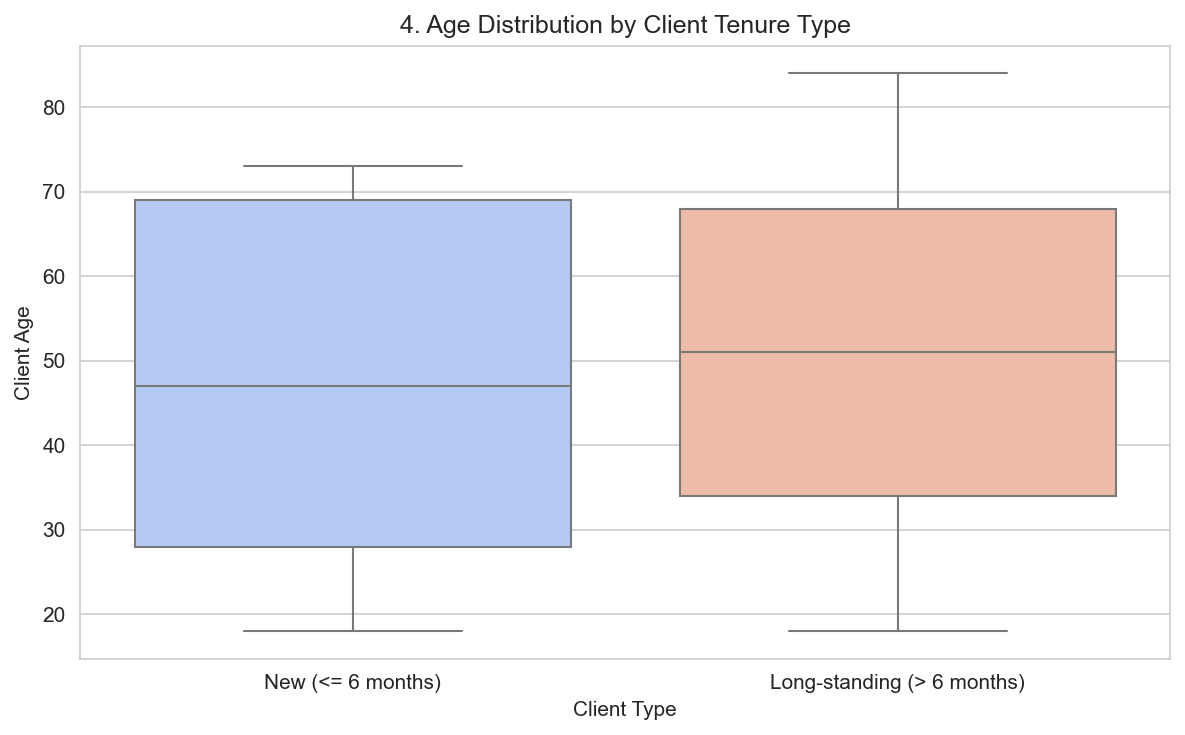

In [128]:
# --- Plot 4: Age Distribution by Client Tenure Type (Box Plot) ---
plt.figure(figsize=(8, 5))
sns.boxplot(x='client_type', y='clnt_age', data=client_df, palette="coolwarm")
plt.title('4. Age Distribution by Client Tenure Type', fontsize=12)
plt.ylabel('Client Age', fontsize=10)
plt.xlabel('Client Type', fontsize=10)
plt.tight_layout()
plt.show()


In [129]:
# --- 4. Additional Finding Table (for the last question in the previous response) ---
tenure_engagement = client_df.groupby('client_type')[['logons_6_mnth', 'calls_6_mnth']].mean().round(2)
tenure_engagement.to_csv('tenure_engagement_summary.csv')
print("\nAdditional finding table saved to 'tenure_engagement_summary.csv'.")
print(tenure_engagement)


Additional finding table saved to 'tenure_engagement_summary.csv'.
                            logons_6_mnth  calls_6_mnth
client_type                                            
New (<= 6 months)                    5.00          2.56
Long-standing (> 6 months)           5.04          3.50


C:\Users\rahal\AppData\Local\Temp\ipykernel_17040\386304081.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_engagement = client_df.groupby('client_type')[['logons_6_mnth', 'calls_6_mnth']].mean().round(2)
